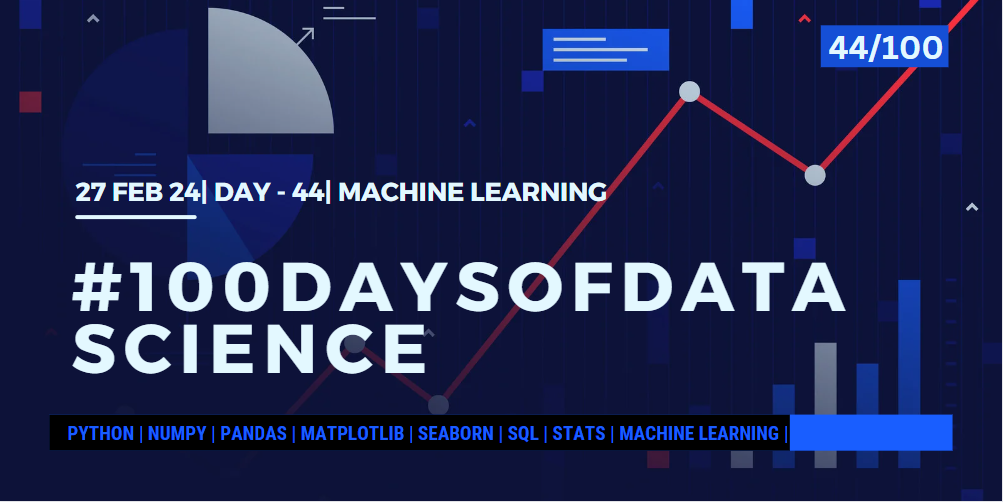

# <center>Lasso Regression & Ridge Regression<center><hr style="border:4.5px solid #108999"> </hr>
 
    

In [2]:
### Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [3]:
### Import the Dataset
df = pd.read_csv(r'C:\Users\hp\Desktop\100DaysOfDataScience\Day 44\Advertising.csv', header = 0, index_col = 0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
df.shape ### Checking Shape

(200, 4)

In [5]:
df.describe() ### Get information of the Dataset

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.columns ### Checking Columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [7]:
df.info() ### Checking Information About a DataFrame

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [8]:
df.isnull().sum() ### Checking Null Values in the Data

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

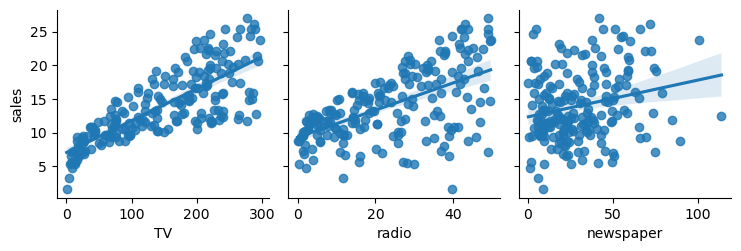

In [10]:
### Assumption of linearity: Every independent variable should have a relationship with the dependent variable
sns.pairplot(df,x_vars=['TV','radio','newspaper'],y_vars='sales',kind='reg')
plt.show()

In [11]:
### Spliting Data into X and y
X = df[['TV','radio','newspaper']]
y = df['sales']
print(X.head())
print('*' * 28)
print(y.head())

      TV  radio  newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4
****************************
1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64


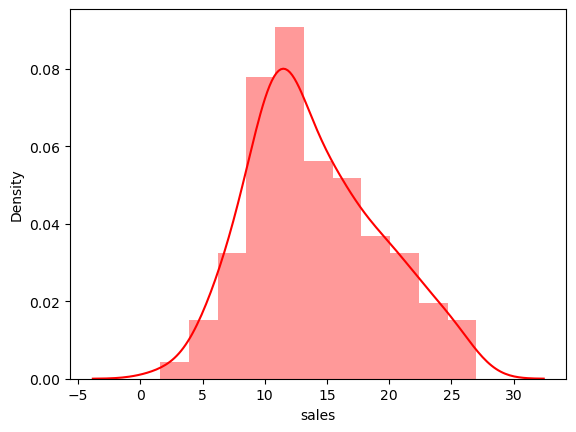

In [12]:
### Assumption of normality: The dependent variable should follow and approximate normal distribution
sns.distplot(y,hist=True,color='red')
plt.show()

In [13]:
### Checking whether the data is normally distributed or not
skew_check = skew(y) 
skew_check

0.4045082487061191

                 TV     radio  newspaper
TV         1.000000  0.054809   0.056648
radio      0.054809  1.000000   0.354104
newspaper  0.056648  0.354104   1.000000


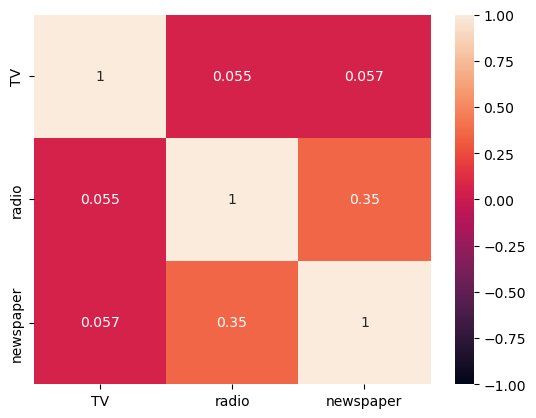

In [14]:
### Assumption of multicollinearity: There should be no multicollinearity between two independent variable
corr_df = X.corr(method='pearson')
print(corr_df)

sns.heatmap(corr_df,vmax=1,vmin=-1,annot=True)
plt.show()

In [15]:
### Spliting into Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (160, 3)
X_test:  (40, 3)
y_train:  (160,)
y_test:  (40,)


## <center>Ridge Regression</center>
* <b>Definition:</b><br>
    Ridge regression, also known as L2 regularization, is a statistical technique used to address the issue of overfitting in linear regression models. Overfitting occurs when a model becomes too complex and closely fits the training data, leading to poor performance on unseen data.<br><br>

* <b>How it Works:</b><br>
    Ridge regression introduces a penalty term to the cost function (the function used to measure the model's error) that penalizes the coefficients (weights) of the model. This penalty term discourages the model from assigning excessively large values to the coefficients, ultimately leading to a simpler and more generalizable model.<br><br>

* <b>Key Points:</b>
    1. <b>Regularization:</b> Ridge regression is a type of regularization technique that aims to improve the generalization ability of a model by preventing overfitting.
    2. <b>Penalty Term:</b> The penalty term is added to the standard cost function and is proportional to the sum of the squared coefficients. Higher values of the penalty term (controlled by a parameter called lambda) lead to a stronger penalty on large coefficients.
    3. <b>Coefficient Shrinking:</b> By penalizing large coefficients, ridge regression tends to shrink the coefficients towards zero. This helps to reduce the model's complexity and prevent it from overfitting the training data.
    4. <b>Bias-Variance Trade-off:</b> While ridge regression reduces overfitting, it can also introduce a slight bias to the model. This is a trade-off, as reducing overfitting often comes at the cost of introducing some bias.<br><br>

* <b>Example:</b><br>
    Imagine you're trying to predict house prices based on square footage and age. A standard linear regression model might overfit if it assigns very high weight to both features, leading to a model that fits the training data perfectly but may not perform well on new, unseen houses.

    By applying ridge regression with an appropriate lambda value, the coefficients for both square footage and age may be shrunk slightly, making the model less sensitive to specific data points and more likely to generalize well to unseen houses.<br><br>

* <b>Advantages:</b><br>
    * Reduces overfitting and improves model generalization.
    * More robust to outliers in the data compared to standard linear regression.
    * Provides a simpler and easier to interpret model compared to complex models used to address overfitting.<br><br>
    
* <b>Disadvantages:</b><br>
    * Introduces a small bias to the model.
    * May not be as effective as other regularization techniques (e.g., Lasso regression) for datasets with highly correlated features.<br><br>


In [16]:
#create a model object
ri = Ridge()
#train the model object
ri.fit(X_train,y_train)

#print intercept and coefficient
print(ri.intercept_)
print(ri.coef_)

3.254199650479162
[ 0.0437726   0.19342655 -0.00222742]


In [17]:
#predict using the model
y_pred = ri.predict(X_test)
print(y_pred)

[18.16245391 12.92652317 18.05310583 23.64456781 20.70427081 14.28225391
 14.94495534 21.38219547 21.1749383  12.73100687 24.00301993  7.21553865
 12.2475655  19.24339936 19.38241343 13.45636091 19.6246441   9.2530879
 21.13256894 20.90746193 15.53483293 10.92515347 22.82945286 15.8121711
 17.42522236  8.16221866 11.89769872 12.70328706 21.74124009  7.96215012
 12.50103034 20.45525511  4.7213209   4.72273082 16.75300902 15.75816807
  6.74426955 17.73481459  9.01600544 13.617696  ]


In [18]:
ri.score(X_train,y_train)

0.9209087550181967

In [19]:
# Checking r2 score for the model
r2 = r2_score(y_test,y_pred)
print("R-squared: ",r2)

# Checking rmse score for the model
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE: ",rmse)

# Checking adj. r2 score for the model
adjusted_r_squared = 1 - (1 - r2) * (len(y) - 1) / (len(y) - X.shape[1] - 1)
print("Adj R-squared: ",adjusted_r_squared)

R-squared:  0.8353686978689225
RMSE:  2.588518324306081
Adj R-squared:  0.8328488309995693


## <center> Lasso Regression</center>

* <b>Definition:</b><br>
    Lasso regression, also known as Least Absolute Shrinkage and Selection Operator, is a linear regression technique that performs both variable selection and regularization to enhance the prediction accuracy and interpretability of the resulting statistical model. Lasso regression is a valuable technique for linear regression when dealing with high-dimensional data or seeking model interpretability.<br><br>

* <b>Key Points:</b><br>
    * <b>Variable selection:</b> Lasso regression shrinks the coefficients of some features towards zero, effectively removing them from the model. This helps identify and eliminate irrelevant or redundant variables, leading to a simpler and potentially more interpretable model.
    * <b>Regularization:</b> Lasso regression penalizes the sum of the absolute values of the coefficients, pushing some towards zero and preventing overfitting. This helps improve the model's generalization ability, meaning it performs well on unseen data.<br><br>

* <b>Example:</b><br>
    * <b>Scenario:</b> You're building a model to predict house prices based on various features like area, number of bedrooms, and location. However, some features might be irrelevant or correlated, potentially leading to overfitting.
    * <b>Solution:</b> Applying Lasso regression can:
        * <b>Identify less important features:</b> Lasso may shrink some coefficients to zero, effectively removing those features from the model. For example, it might remove features like "number of fireplaces" or "type of flooring" if they have minimal impact on price prediction.
        * <b>Prevent overfitting:</b> The penalty term in Lasso helps the model focus on the most relevant features, reducing the risk of overfitting to the training data and potentially improving performance on new data.<br><br>



* <b>Advantages:</b><br>
    * Improved interpretability: By selecting a smaller number of features, Lasso provides a simpler model that is easier to understand and interpret.
    * Potentially better generalization: Regularization can help prevent overfitting and improve the model's performance on new data.<br><br>

* <b>Disadvantages:</b><br>
    * May not be suitable for all problems: If all features are relevant to the prediction, Lasso might discard valuable information by setting coefficients to zero.
    * Tuning the regularization parameter (lambda) is crucial: Finding the optimal value for the lambda parameter that controls the amount of shrinkage is important and can require experimentation.<br><br>


In [20]:
#create a model object
la = Lasso()
#train the model object
la.fit(X_train,y_train)

#print intercept and coefficient
print(la.intercept_)
print(la.coef_)

3.3367940582203186
[ 0.04362374  0.18766033 -0.        ]


In [21]:
#predict using the model
y_pred = la.predict(X_test)
print(y_pred)

[18.06429565 12.89291061 18.06240985 23.59022036 20.60240696 14.24765273
 14.95215852 21.28397604 21.03270918 12.70073142 23.91262327  7.30875314
 12.27479157 19.18615151 19.40987087 13.37169781 19.52635995  9.18340605
 21.01174436 20.74314144 15.48896526 10.79867965 22.74877319 15.78495133
 17.45553519  8.22914947 11.77231457 12.65310134 21.59003277  7.96379194
 12.53499059 20.35780103  4.83670342  4.8659235  16.78762249 15.83910155
  6.83541797 17.72822269  9.10768074 13.67675885]


In [22]:
r2l = r2_score(y_test,y_pred) 
print("R-squared: ",r2l)

rmsel = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE: ",rmsel)

adjusted_r_squaredl = 1 - (1 - r2) * (len(y) - 1) / (len(y) - X.shape[1] - 1)
print("Adj R-squared: ",adjusted_r_squaredl)

R-squared:  0.8360506658527163
RMSE:  2.5831514271094234
Adj R-squared:  0.8328488309995693


* <b>Lasso vs. Ridge Regression:</b><br>
Both techniques perform regularization, but they differ in how they penalize coefficients.
    * <b>Lasso Regression:</b> Uses L1 norm penalty (sum of absolute values), leading to sparsity – some coefficients become exactly zero.
    * <b>Ridge Regression:</b> Uses L2 norm penalty (sum of squared values), shrinking coefficients towards zero but not eliminating them completely.

In [23]:
### Comparing results of Ridge and Lasso regression 
print("Ridge: ")
print("R-squared: ",r2)
print("RMSE: ",rmse)
print("Adj R-squared: ",adjusted_r_squared)
print("-" * 40)
print("Lasso: ")
print("R-squared: ",r2l)
print("RMSE: ",rmsel)
print("Adj R-squared: ",adjusted_r_squaredl)

Ridge: 
R-squared:  0.8353686978689225
RMSE:  2.588518324306081
Adj R-squared:  0.8328488309995693
----------------------------------------
Lasso: 
R-squared:  0.8360506658527163
RMSE:  2.5831514271094234
Adj R-squared:  0.8328488309995693
